In [1]:
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')


In [2]:
users = pd.read_csv('users.dat', sep='::', engine='python', 
                   names=['user_id','twitter_id'])

In [3]:
users.head()

,user_id,twitter_id
0,1,139564917
1,2,17528189
2,3,522540374
3,4,475571186
4,5,215022153


In [4]:
movies = pd.read_csv('movies.dat', sep='::', engine='python',
                    names=['movie_id', 'movie_title', 'genre'])

In [5]:
movies.head()

,movie_id,movie_title,genre
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


In [6]:
ratings = pd.read_csv('ratings.dat', sep='::', engine='python', 
                     names=['user_id','movie_id', 'rating', 'rating_timestamp']
                     ).sort_values("rating_timestamp")

In [7]:
ratings.head()

,user_id,movie_id,rating,rating_timestamp
147805,11639,2171847,6,1362062307
613758,48189,444778,8,1362062624
641371,50219,1411238,6,1362062838
679235,52967,1496422,7,1362063503
779780,61176,118799,5,1362063653


In [8]:
ratings["rating_timestamp"] = pd.to_datetime(ratings["rating_timestamp"], unit='s')

In [9]:
ratings.head()

,user_id,movie_id,rating,rating_timestamp
147805,11639,2171847,6,2013-02-28 14:38:27
613758,48189,444778,8,2013-02-28 14:43:44
641371,50219,1411238,6,2013-02-28 14:47:18
679235,52967,1496422,7,2013-02-28 14:58:23
779780,61176,118799,5,2013-02-28 15:00:53


In [10]:
ratings['rating'].value_counts()

8     222146
7     206680
9     130106
6     120370
10    108351
5      69747
4      28193
3      15487
1      10814
2       9223
0        281
Name: rating, dtype: int64

In [11]:
ratings['rating'].describe()

count    921398.000000
mean          7.312627
std           1.852559
min           0.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

<AxesSubplot:>

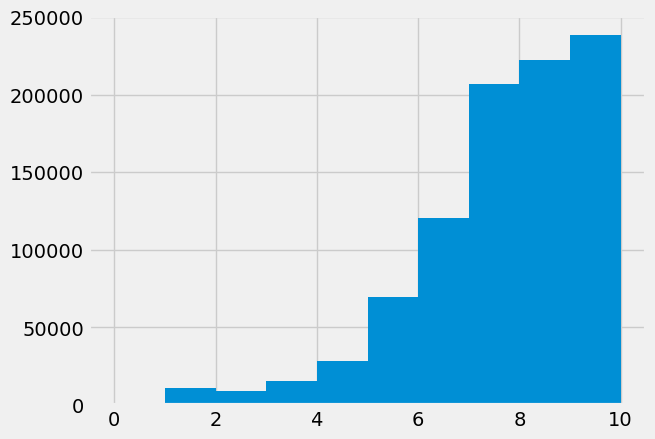

In [12]:
ratings['rating'].hist(bins=10)

<AxesSubplot:>

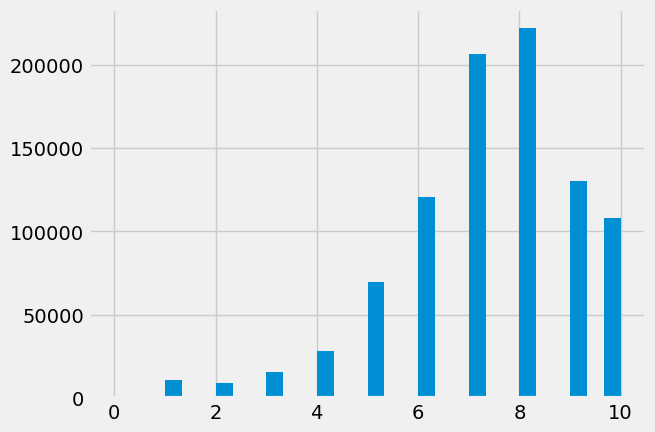

In [13]:
ratings['rating'].hist(bins=30)

In [19]:
print(f"you have {len(users.user_id.unique())} unique user ids")

you have 71707 unique user ids


In [20]:
ratings.user_id.value_counts().describe()

count    71707.000000
mean        12.849485
std         45.557594
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       2875.000000
Name: user_id, dtype: float64

In [22]:
ratings.head(20)

,user_id,movie_id,rating,rating_timestamp
147805,11639,2171847,6,2013-02-28 14:38:27
613758,48189,444778,8,2013-02-28 14:43:44
641371,50219,1411238,6,2013-02-28 14:47:18
679235,52967,1496422,7,2013-02-28 14:58:23
779780,61176,118799,5,2013-02-28 15:00:53
779802,61176,338013,4,2013-02-28 15:04:39
18077,1245,1003052,8,2013-02-28 15:05:06
779723,61176,64665,8,2013-02-28 15:07:27
280088,22092,884328,7,2013-02-28 15:08:24
311729,24531,1559547,9,2013-02-28 15:09:49


In [ ]:
movies_rating = 